In [2]:
#import pickle
#pickle.dump({"pcaR":pcaR,"pcaD":pcaD,"pRatem":pRatem,\
#             "dm_m":dmPCALm,"pRateCoeffStd":pr_PCA_std,"dmCoeffStd":dm_PCA_std},open('pcaR.pklz','wb'))

# read the data from the pickle file
#pickle.dump({"pca_logdm":pca_logdm,"pca_logprate":pca_logprate,\
#                 "logDm_m":logDm_m,"logPRate_m":logPRate_m,"pca_dm_log_coeffs_std":\
#                    pca_dm_log_coeffs_std,"pca_prate_log_coeffs_std":pca_prate_log_coeffs_std},f)

import pickle
d = pickle.load(open('pcaR.pklz','rb'))
pcaR = d["pcaR"]
pcaD = d["pcaD"]
pRatem = d["pRatem"]
dm_m = d["dm_m"]
pr_PCA_std = d["pRateCoeffStd"]
dm_PCA_std = d["dmCoeffStd"]

d=pickle.load(open('pca_logdm.pkl','rb'))
pca_logdm = d["pca_logdm"]
pca_logprate = d["pca_logprate"]
logDm_m = d["logDm_m"]
logPRate_m = d["logPRate_m"]
pca_dm_log_coeffs_std = d["pca_dm_log_coeffs_std"]
pca_prate_log_coeffs_std = d["pca_prate_log_coeffs_std"]


FileNotFoundError: [Errno 2] No such file or directory: 'pca_logdm.pkl'

In [28]:

import matplotlib.pyplot as plt
import numpy as np
def genProfile(pr_PCA_std,dm_PCA_std,pRatem,dmPCALm,pcaR,pcaD):
    pRateCoeffs=np.random.randn(11)*pr_PCA_std*1.025
    dmCoeffs=np.random.randn(11)*dm_PCA_std*1.025
    pRateGen=np.dot(pRateCoeffs,pcaR.components_)+pRatem
    dmGen=np.dot(dmCoeffs,pcaD.components_)+dmPCALm
    return pRateGen,dmGen


In [33]:
dmPCALm_ad=dm_m.copy()
dmPCALm_ad[:-14]=dm_m[:-14]*0.8 
pRateGenL=[]
for i in range(150):
    pRateGen,dmGen=genProfile(pr_PCA_std,dm_PCA_std,pRatem,dmPCALm_ad,pcaR,pcaD)
    pRateGenL.append(pRateGen.copy())
    continue
    plt.subplot(121)
    plt.plot(pRateGen,np.arange(50),'*',markersize=2)
    plt.ylim(50,0)
    plt.subplot(122)
    plt.plot(dmGen,np.arange(50),'*',markersize=2)
    plt.ylim(50,0)


(50.0, 0.0)

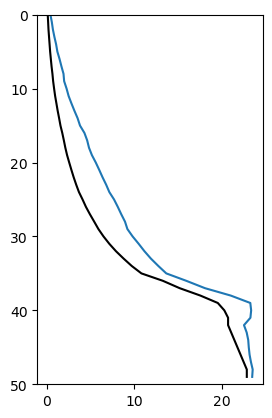

In [34]:

plt.figure()
plt.subplot(121)
pRateGenL=np.array(pRateGenL)
pRateGenL[pRateGenL<0]=0
plt.plot(np.array(pRateGenL).mean(axis=0),np.arange(50),'-',markersize=2)
plt.plot(pRatem,np.arange(50),'k-',markersize=2)
plt.ylim(50,0)